In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv")
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [7]:
df[df.tripId == 6351558574044883205]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


In [8]:
df.delay.value_counts()

0     30531
1     24653
2      8833
3      4004
4      1818
5       816
6       347
7       190
8        85
9        62
10       42
14       36
12       34
11       25
13       24
15       11
16        3
19        2
18        1
Name: delay, dtype: int64

In [9]:
df.delay.value_counts(normalize = True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

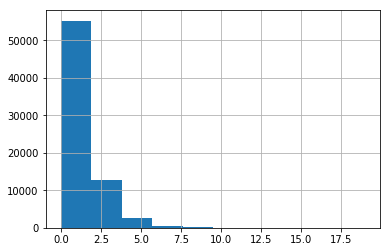

In [10]:
df.delay.hist();

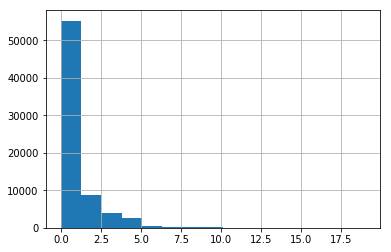

In [11]:
df.delay.hist(bins = 15);

In [12]:
# long tail
df.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

In [13]:
# suspicious features:
## stop, number, direction

df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [15]:
X = df[["number"]].values
y = df["delay"].values
model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-0.9127585343839395, 0.05389454602788386)

In [18]:
# change from min to sec
df["delay_secs"] = df["delay"].map(lambda x: x*60)
X = df[["number"]].values
y = df["delay_secs"].values
model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-54.76551206303637, 3.233672761673034)

In [19]:
df["delay_secs"] = df["delay"].map(lambda x: x*60)
X = df[["number", "stop"]].values
y = df["delay_secs"].values
model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-53.08641170407217, 3.205098659540954)

In [22]:
df["delay_secs"] = df["delay"].map(lambda x: x*60)
df["direction_cat"] = df["direction"].factorize()[0]
df["vehicleId"].fillna(-1, inplace = True)

X = df[["number", "stop", "direction_cat", "vehicleId"]].values
y = df["delay_secs"].values
model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-50.509485774561064, 3.16482686257641)

In [27]:
df["delay_secs"] = df["delay"].map(lambda x: x*60)
df["direction_cat"] = df["direction"].factorize()[0]
df["vehicleId"].fillna(-1, inplace = True)
df["seq_num"].fillna(-1, inplace = True)

X = df[["number", "stop", "direction_cat", "vehicleId", 
       "seq_num"]].values
y = df["delay_secs"].values
model = DecisionTreeRegressor(max_depth = 15)
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-47.29107380145768, 2.393605804549753)

In [32]:
X = df[["number", "stop", "direction_cat", "vehicleId", 
       "seq_num"]].values
y = df["delay_secs"].values
model = RandomForestRegressor(max_depth = 10,
                             n_estimators=50,
                             n_jobs=8) #cores on my machine
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-48.28512051796977, 2.4843954844010345)

In [36]:
# new features:
## tram number * direction
## stop * direction

df["num_dir_id"] = df.apply(lambda x: "{} {}".format(x["number"], x["direction"]),
         axis=1).factorize()[0]
df["stop_dir_id"] = df.apply(lambda x: "{} {}".format(x["stop"], x["direction"]),
         axis=1).factorize()[0]

feats = ["number", "stop", "direction_cat", "vehicleId", 
       "seq_num", "num_dir_id", "stop_dir_id"]
X = df[feats].values
y = df["delay_secs"].values
model = RandomForestRegressor(max_depth = 10,
                             n_estimators=50,
                             n_jobs=8) #cores on my machine
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-48.39929809353762, 2.495059659387999)

In [40]:
feats = ["number", "stop", "direction_cat", "vehicleId", 
       "seq_num", "num_dir_id", "stop_dir_id"]
X = df[feats].values
y = df["delay_secs"].values
model = DecisionTreeRegressor(max_depth = 10,
                             random_state=0)#freeze randomness
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-48.911446275525776, 2.5252312592564357)

In [49]:
# new feature - planned time at stop
df["plannedTime"] = pd.to_datetime(df["plannedTime"])
df[["plannedTime"]].info()
df["plannedTime"].dt.hour.value_counts()
# and hour
df["hour"] = df["plannedTime"].dt.hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71517 entries, 0 to 71516
Data columns (total 1 columns):
plannedTime    71517 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 558.8 KB


In [53]:
feats = ["number", "stop", "direction_cat", "vehicleId", 
       "seq_num", "num_dir_id", "stop_dir_id", "hour"]
X = df[feats].values
y = df["delay_secs"].values
model = RandomForestRegressor(max_depth = 10,
                             random_state=0,
                             n_estimators=50,
                             n_jobs=8)
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-52.77065500187765, 1.5171351033711182)

In [57]:
# final
feats = ["number", "stop", "direction_cat", "vehicleId", 
       "seq_num", "num_dir_id", "stop_dir_id"]
X = df[feats].values
y = df["delay_secs"].values
model = RandomForestRegressor(max_depth = 10,
                             random_state=0,
                             n_estimators=50,
                             n_jobs=8)
scores = cross_val_score(model, X, y, cv = 3, 
                scoring = "neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-48.41474324600096, 2.502571096240746)